In [2]:
from brian2 import *

In [9]:
start_scope()

tau = 10*ms

eqs = '''
dv/dt = (1-v)/tau : 1
'''

In [10]:
start_scope()

G = NeuronGroup(1, eqs, method='exact')
print('Before v = %s' % G.v[0])
run(100*ms)
print('After v = %s' % G.v[0])


Before v = 0.0


WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/ (DistutilsPlatformError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


After v = 0.9999546000702376


In [11]:
print('Expected value of v = %s' % (1-exp(-100*ms/tau)))


Expected value of v = 0.9999546000702375


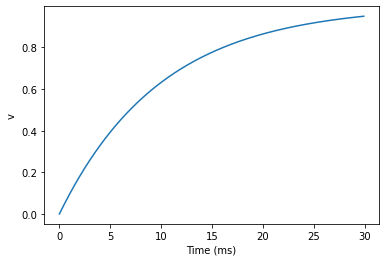

In [17]:
start_scope()

G = NeuronGroup(1, eqs, method='exact')
M = StateMonitor(G, 'v', record=True)

run(30*ms)

plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');

In [18]:
M

<StateMonitor, recording ['v'] from neurongroup_1>

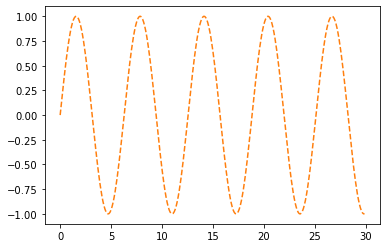

In [21]:
plot(M.t/ms, sin(M.t/ms), 'C1--',label='Analytic')


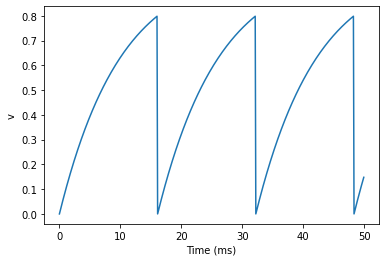

In [23]:
start_scope()

tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''

G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v = 0', method='exact')

M = StateMonitor(G, 'v', record=0)
run(50*ms)
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');

In [38]:
start_scope()

G = NeuronGroup(1, eqs, threshold='v>0.5', reset='v = 0', method='exact')

spikemon = SpikeMonitor(G)
M = StateMonitor(G, 'v', record=0)

run(50*ms)

print('Spike times: %s' % spikemon.t[:])

Spike times: [ 6.9 13.9 20.9 27.9 34.9 41.9 48.9] ms


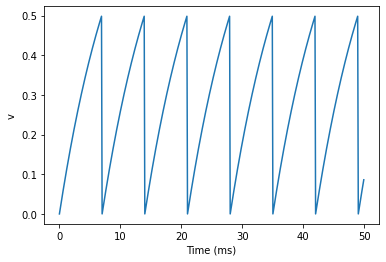

In [39]:
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');

모니터를 설정하고  run 을 해주어야 simulation 결과를 기록한다. 

In [56]:
spikemon.num_spikes

7

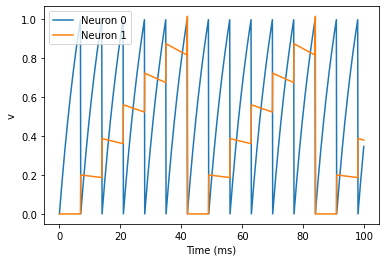

In [72]:
start_scope()

eqs = '''
dv/dt = (I-v)/tau : 1
I : 1
tau : second
'''
G = NeuronGroup(2, eqs, threshold='v>1', reset='v = 0', method='exact')
G.I = [2, 0] 
G.tau = [10, 100]*ms

# Comment these two lines out to see what happens without Synapses
S = Synapses(G, G, on_pre='v_post += 0.2')
S.connect(i=0, j=1)

M = StateMonitor(G, 'v', record=True)

run(100*ms)

plot(M.t/ms, M.v[0], label='Neuron 0')
plot(M.t/ms, M.v[1], label='Neuron 1')
xlabel('Time (ms)')
ylabel('v')
legend();

### 다른 크기의 시냅스 설정

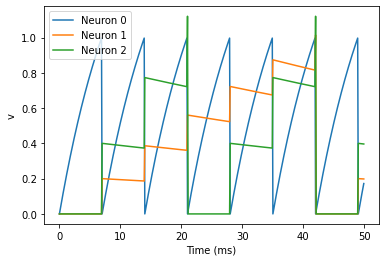

In [73]:
start_scope()

eqs = '''
dv/dt = (I-v)/tau : 1
I : 1
tau : second
'''
G = NeuronGroup(3, eqs, threshold='v>1', reset='v = 0', method='exact')
G.I = [2, 0, 0]
G.tau = [10, 100, 100]*ms

# Comment these two lines out to see what happens without Synapses
S = Synapses(G, G, 'w : 1', on_pre='v_post += w')  #이곳을 유심히 살펴보자. 다르다.  
S.connect(i=0, j=[1, 2]) 
S.w = 'j*0.2'

M = StateMonitor(G, 'v', record=True)

run(50*ms)

plot(M.t/ms, M.v[0], label='Neuron 0')
plot(M.t/ms, M.v[1], label='Neuron 1')
plot(M.t/ms, M.v[2], label='Neuron 2')
xlabel('Time (ms)')
ylabel('v')
legend();

### 시냅스 도착 지연시간 

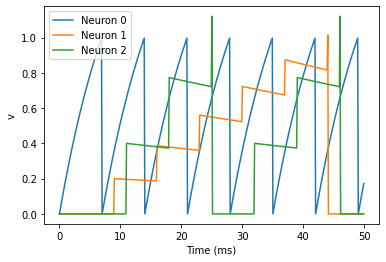

In [74]:
start_scope()

eqs = '''
dv/dt = (I-v)/tau : 1
I : 1
tau : second
'''
G = NeuronGroup(3, eqs, threshold='v>1', reset='v = 0', method='exact')
G.I = [2, 0, 0]
G.tau = [10, 100, 100]*ms

S = Synapses(G, G, 'w : 1', on_pre='v_post += w')
S.connect(i=0, j=[1, 2])
S.w = 'j*0.2'
S.delay = 'j*2*ms' 

M = StateMonitor(G, 'v', record=True)

run(50*ms)

plot(M.t/ms, M.v[0], label='Neuron 0')
plot(M.t/ms, M.v[1], label='Neuron 1')
plot(M.t/ms, M.v[2], label='Neuron 2')
xlabel('Time (ms)')
ylabel('v')
legend();

neuron이 두개가 있을 때, 하나의 neuron 을 가깝게 있다고 설정하고 다른 하나를 먼 곳에 있다고 설정할 때 *S.delay = 'j*2*ms'*  의 공식은 맞다.

In [76]:
net

<Network at time t=0. s, containing objects: NetworkOperation(clock=Clock(dt=0.5 * msecond, name='networkoperation_clock'), when=end, order=0, name='networkoperation')>

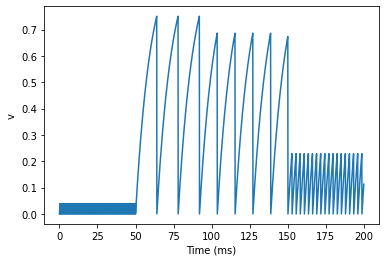

In [78]:
start_scope()


'''
Network Operation Example:

Change the threshold of a neuron every 50 ms with use of 
network operation.
'''

import numpy as np
from brian2 import (plot, network_operation, ms, show, NeuronGroup,
                    StateMonitor, run, xlabel, ylabel)

tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
vt : 1
'''

G = NeuronGroup(1, eqs, threshold='v>vt', reset='v = 0', method='exact')
G.vt = 0.8


@network_operation(dt=50*ms)
def update_threshold():
    G.vt = np.random.uniform(low=0, high=1)


M = StateMonitor(G, 'v', record=0)
run(200*ms)
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v')
show()

위의 예는 network opertation 을 쓰는 예입니다. 